# Navigation

---

Congratulations for completing the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893)!  In this notebook, you will learn how to control an agent in a more challenging environment, where it can learn directly from raw pixels!  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
from dqn.agent import Agent
from utils.history import History

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/VisualBanana.app"`
- **Windows** (x86): `"path/to/VisualBanana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/VisualBanana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/VisualBanana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/VisualBanana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `VisualBanana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="VisualBanana.app")
```

In [2]:
env = UnityEnvironment(file_name="./env/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The environment state is an array of raw pixels with shape `(1, 84, 84, 3)`.  *Note that this code differs from the notebook for the project, where we are grabbing **`visual_observations`** (the raw pixels) instead of **`vector_observations`**.* A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

Number of agents: 1
Number of actions: 4
States look like:


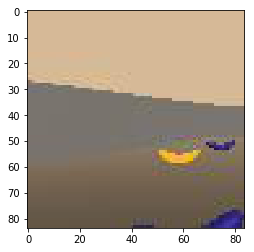

States have shape: (1, 84, 84, 3)


In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.visual_observations[0]
print('States look like:')
plt.imshow(np.squeeze(state))
plt.show()
state_size = state.shape
print('States have shape:', state.shape)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
"""
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.visual_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.visual_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
"""

'\nenv_info = env.reset(train_mode=False)[brain_name] # reset the environment\nstate = env_info.visual_observations[0]            # get the current state\nscore = 0                                          # initialize the score\nwhile True:\n    action = np.random.randint(action_size)        # select an action\n    env_info = env.step(action)[brain_name]        # send the action to the environment\n    next_state = env_info.visual_observations[0]   # get the next state\n    reward = env_info.rewards[0]                   # get the reward\n    done = env_info.local_done[0]                  # see if episode has finished\n    score += reward                                # update the score\n    state = next_state                             # roll over the state to next time step\n    if done:                                       # exit loop if episode finished\n        break\n    \nprint("Score: {}".format(score))\n'

When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
env = UnityEnvironment(file_name="./env/Banana.x86_64", no_graphics=False)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [8]:
agent_params = {
    "o_dim": 4,
    "u_dim": brain.vector_action_space_size,
    "lrate": 5e-4,
    "tau": 1e-3,
    "gamma": 0.99,
    "eps_min": 0.05,
    "n_step_annealing": 100000,
    "update_freq": 4,
    "buffer_size": 1000000,
    "batch_size": 32,
    "double_q": True,
    "dueling": True,
    "model_path": "./models/visual_dueling_ddqn",
    "visual": True,
}

In [9]:
def learning(params, epochs, mean_score=13.0, stable_episodes=100, log_interval=10):
    dqn = Agent(**params)
    history = History((84, 84), params["o_dim"])
    scores = list()
    progress_bar = tqdm(range(epochs))
    for ep in progress_bar:
        env_info = env.reset(train_mode=True)[brain_name]
        history.add(np.squeeze(env_info.visual_observations[0]))
        state = history.state
        score = 0
        while True:
            action = dqn.act(state, True)
            
            env_info = env.step(action)[brain_name]
            
            history.add(np.squeeze(env_info.visual_observations[0]))
            next_state = history.state
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            dqn.observe(state, action, reward, next_state, done)
            score += reward
            state = next_state
            if done:
                break
                
        scores.append(score)
        if ep % log_interval == (log_interval - 1):
            m = np.round(np.mean(scores[ep-10:]),3)
            progress_bar.set_description("Mean reward from 10 episodes {}".format(m))
        if score >= max(scores):
            dqn.save_model()
        if len(scores) > stable_episodes:
            if np.mean(scores[ep-stable_episodes:]) > mean_score:
                break
                
    return scores

scores = learning(agent_params, 1000)
env.close()

  0%|          | 0/1000 [00:00<?, ?it/s]

Model found and loaded!
Act 0.002790212631225586
Step 0.010589361190795898
State 0.0003261566162109375
Observe 3.1948089599609375e-05
Act 0.0007989406585693359
Step 0.0027031898498535156
State 0.00026607513427734375
Observe 2.4080276489257812e-05
Act 0.00079345703125
Step 0.03194260597229004
State 0.00031280517578125
Observe 2.4557113647460938e-05
Act 0.0007815361022949219
Step 0.011764287948608398
State 0.0003039836883544922
Observe 2.5272369384765625e-05
Act 0.0009293556213378906
Step 0.0022788047790527344
State 0.0003368854522705078
Observe 2.4318695068359375e-05
Act 0.0008342266082763672
Step 0.012928009033203125
State 0.0003204345703125
Observe 2.4318695068359375e-05
Act 0.0007829666137695312
Step 0.0021843910217285156
State 0.0003218650817871094
Observe 2.4080276489257812e-05
Act 0.0007958412170410156
Step 0.0037996768951416016
State 0.00040984153747558594
Observe 2.5272369384765625e-05
Act 0.0008902549743652344
Step 0.002290964126586914
State 0.0003325939178466797
Observe 2.3126

Step 0.002254009246826172
State 0.00022864341735839844
Observe 2.4557113647460938e-05
Act 0.0008656978607177734
Step 0.0065155029296875
State 0.0003960132598876953
Observe 2.6226043701171875e-05
Act 0.0009613037109375
Step 0.0024504661560058594
State 0.0003311634063720703
Observe 0.015143632888793945
Act 0.0007529258728027344
Step 0.0021750926971435547
State 0.0002734661102294922
Observe 2.4318695068359375e-05
Act 0.0008454322814941406
Step 0.0022492408752441406
State 0.0002739429473876953
Observe 2.4080276489257812e-05
Act 0.0008068084716796875
Step 0.002167224884033203
State 0.0002682209014892578
Observe 2.3603439331054688e-05
Act 0.0007717609405517578
Step 0.0021467208862304688
State 0.00027251243591308594
Observe 0.013632535934448242
Act 0.0007193088531494141
Step 0.002651214599609375
State 0.0002627372741699219
Observe 2.3603439331054688e-05
Act 0.0008203983306884766
Step 0.0024101734161376953
State 0.0002682209014892578
Observe 2.3603439331054688e-05
Act 0.0008330345153808594
Ste

Step 0.0023500919342041016
State 0.0003352165222167969
Observe 2.4557113647460938e-05
Act 0.0008358955383300781
Step 0.002470731735229492
State 0.00027561187744140625
Observe 2.4318695068359375e-05
Act 0.0008459091186523438
Step 0.0021810531616210938
State 0.0002715587615966797
Observe 2.4318695068359375e-05
Act 0.000843048095703125
Step 0.002244234085083008
State 0.0002741813659667969
Observe 0.028400182723999023
Act 0.0008647441864013672
Step 0.002190113067626953
State 0.0002663135528564453
Observe 2.3603439331054688e-05
Act 0.0008246898651123047
Step 0.002111673355102539
State 0.0002613067626953125
Observe 2.384185791015625e-05
Act 0.0008008480072021484
Step 0.0023064613342285156
State 0.00027871131896972656
Observe 2.5033950805664062e-05
Act 0.0007841587066650391
Step 0.0021085739135742188
State 0.0002658367156982422
Observe 0.0278012752532959
Act 0.0007221698760986328
Step 0.0023956298828125
State 0.00025916099548339844
Observe 2.3603439331054688e-05
Act 0.0008356571197509766
Step

Observe 0.050668954849243164
Act 0.0008141994476318359
Step 0.0025055408477783203
State 0.00028061866760253906
Observe 2.384185791015625e-05
Act 0.0007884502410888672
Step 0.0022754669189453125
State 0.0002956390380859375
Observe 2.5510787963867188e-05
Act 0.0008492469787597656
Step 0.0021610260009765625
State 0.00027108192443847656
Observe 2.4080276489257812e-05
Act 0.0008482933044433594
Step 0.0021343231201171875
State 0.00026869773864746094
Observe 0.04983854293823242
Act 0.0007176399230957031
Step 0.002222299575805664
State 0.0002696514129638672
Observe 2.4080276489257812e-05
Act 0.0007860660552978516
Step 0.0021550655364990234
State 0.00026798248291015625
Observe 2.4080276489257812e-05
Act 0.0008075237274169922
Step 0.002051115036010742
State 0.0002429485321044922
Observe 2.4080276489257812e-05
Act 0.0009567737579345703
Step 0.002087831497192383
State 0.00026869773864746094
Observe 0.05028939247131348
Act 0.0007314682006835938
Step 0.0023953914642333984
State 0.000274658203125
Obs

  0%|          | 1/1000 [00:03<59:18,  3.56s/it]

Step 0.0022704601287841797
State 0.0002465248107910156
Observe 2.5272369384765625e-05
Act 0.0009150505065917969
Step 0.003659486770629883
State 0.00037980079650878906
Observe 0.05412030220031738
Act 0.0007691383361816406
Step 0.003261566162109375
State 0.0002846717834472656
Observe 2.5033950805664062e-05
Act 0.0008530616760253906
Step 0.002797365188598633
State 0.00028324127197265625
Observe 2.47955322265625e-05
Act 0.0008380413055419922
Step 0.0028450489044189453
State 0.0002753734588623047
Observe 2.4557113647460938e-05
Act 0.0007877349853515625
Step 0.002537965774536133
State 0.00027823448181152344
Observe 0.05365633964538574
Act 0.0007658004760742188
Step 0.003210306167602539
State 0.0003521442413330078
Observe 2.4318695068359375e-05
Act 0.0008187294006347656
Step 0.0024154186248779297
State 0.0002727508544921875
Observe 2.47955322265625e-05
Act 0.0008826255798339844
Step 0.0022287368774414062
State 0.0002334117889404297
Observe 2.4557113647460938e-05
Act 0.0007965564727783203
Step

Observe 0.0655679702758789
Act 0.0007565021514892578
Step 0.0021190643310546875
State 0.00026869773864746094
Observe 2.3603439331054688e-05
Act 0.0008752346038818359
Step 0.0019989013671875
State 0.0002753734588623047
Observe 2.4557113647460938e-05
Act 0.0008635520935058594
Step 0.002118825912475586
State 0.00027298927307128906
Observe 2.574920654296875e-05
Act 0.0008497238159179688
Step 0.002197265625
State 0.0002758502960205078
Observe 0.06647205352783203
Act 0.0011467933654785156
Step 0.0025892257690429688
State 0.0003108978271484375
Observe 2.4080276489257812e-05
Act 0.0008442401885986328
Step 0.002305269241333008
State 0.0002448558807373047
Observe 2.3603439331054688e-05
Act 0.0007877349853515625
Step 0.001981973648071289
State 0.0002770423889160156
Observe 2.5033950805664062e-05
Act 0.0008451938629150391
Step 0.0023877620697021484
State 0.00027632713317871094
Observe 0.06642627716064453
Act 0.0008544921875
Step 0.002214670181274414
State 0.0002598762512207031
Observe 2.3841857910

Observe 0.07818293571472168
Act 0.0007884502410888672
Step 0.0024518966674804688
State 0.0002684593200683594
Observe 3.147125244140625e-05
Act 0.0008120536804199219
Step 0.001993417739868164
State 0.00026869773864746094
Observe 2.384185791015625e-05
Act 0.0008101463317871094
Step 0.0020346641540527344
State 0.00028228759765625
Observe 2.5510787963867188e-05
Act 0.000843048095703125
Step 0.002355813980102539
State 0.0002894401550292969
Observe 0.07993769645690918
Act 0.0008521080017089844
Step 0.0032167434692382812
State 0.00025916099548339844
Observe 2.47955322265625e-05
Act 0.0009174346923828125
Step 0.0022988319396972656
State 0.0002703666687011719
Observe 2.384185791015625e-05
Act 0.0009701251983642578
Step 0.002011537551879883
State 0.0002646446228027344
Observe 2.4318695068359375e-05
Act 0.0008294582366943359
Step 0.0019423961639404297
State 0.0002741813659667969
Observe 0.07879447937011719
Act 0.0007195472717285156
Step 0.0022411346435546875
State 0.00025963783264160156
Observe 2

Observe 0.09006857872009277
Act 0.0008378028869628906
Step 0.0026280879974365234
State 0.0002474784851074219
Observe 2.4080276489257812e-05
Act 0.0008563995361328125
Step 0.0021796226501464844
State 0.0002689361572265625
Observe 2.4557113647460938e-05
Act 0.0008490085601806641
Step 0.010434627532958984
State 0.00029015541076660156
Observe 2.5987625122070312e-05
Act 0.0009443759918212891
Step 0.0025081634521484375
State 0.00026535987854003906
Observe 0.08924007415771484
Act 0.0007796287536621094
Step 0.0024025440216064453
State 0.00034546852111816406
Observe 2.384185791015625e-05
Act 0.0008394718170166016
Step 0.0024881362915039062
State 0.0002760887145996094
Observe 2.4080276489257812e-05
Act 0.0007977485656738281
Step 0.0020742416381835938
State 0.00026798248291015625
Observe 2.3365020751953125e-05
Act 0.0008389949798583984
Step 0.0020036697387695312
State 0.0002460479736328125
Observe 0.09073281288146973
Act 0.0008375644683837891
Step 0.0029168128967285156
State 0.00025177001953125
O

  0%|          | 2/1000 [00:10<1:15:20,  4.53s/it]

Observe 0.09775614738464355
Act 0.0009541511535644531
Step 0.003500699996948242
State 0.00035452842712402344
Observe 2.7418136596679688e-05
Act 0.0011234283447265625
Step 0.0027005672454833984
State 0.00028634071350097656
Observe 2.47955322265625e-05
Act 0.0008728504180908203
Step 0.002829313278198242
State 0.0002803802490234375
Observe 2.3603439331054688e-05
Act 0.0008537769317626953
Step 0.002641916275024414
State 0.00047659873962402344
Observe 0.09727859497070312
Act 0.0007193088531494141
Step 0.0026650428771972656
State 0.0002570152282714844
Observe 2.4318695068359375e-05
Act 0.0007648468017578125
Step 0.002190828323364258
State 0.00026297569274902344
Observe 2.384185791015625e-05
Act 0.0008382797241210938
Step 0.0021982192993164062
State 0.0002701282501220703
Observe 2.5272369384765625e-05
Act 0.0008091926574707031
Step 0.0023038387298583984
State 0.00026988983154296875
Observe 0.09817957878112793
Act 0.0007731914520263672
Step 0.0022690296173095703
State 0.0002410411834716797
Obs

Observe 0.10848331451416016
Act 0.0007483959197998047
Step 0.0023005008697509766
State 0.00024771690368652344
Observe 2.384185791015625e-05
Act 0.0008158683776855469
Step 0.0021698474884033203
State 0.0002951622009277344
Observe 2.5510787963867188e-05
Act 0.0009038448333740234
Step 0.002451658248901367
State 0.0003452301025390625
Observe 2.4080276489257812e-05
Act 0.0011093616485595703
Step 0.002374410629272461
State 0.00040459632873535156
Observe 0.11263751983642578
Act 0.0007729530334472656
Step 0.0030477046966552734
State 0.0002110004425048828
Observe 2.6702880859375e-05
Act 0.001056671142578125
Step 0.0023691654205322266
State 0.00029015541076660156
Observe 2.4318695068359375e-05
Act 0.0008270740509033203
Step 0.0019152164459228516
State 0.0002598762512207031
Observe 2.4318695068359375e-05
Act 0.0008442401885986328
Step 0.0025289058685302734
State 0.00025582313537597656
Observe 0.11419248580932617
Act 0.0007867813110351562
Step 0.0023794174194335938
State 0.0002739429473876953
Obse

Observe 0.12184762954711914
Act 0.0008633136749267578
Step 0.0021288394927978516
State 0.0003058910369873047
Observe 2.4080276489257812e-05
Act 0.0008580684661865234
Step 0.0020787715911865234
State 0.0003190040588378906
Observe 2.4318695068359375e-05
Act 0.0010025501251220703
Step 0.002428293228149414
State 0.000232696533203125
Observe 2.3603439331054688e-05
Act 0.0007977485656738281
Step 0.002045154571533203
State 0.00026869773864746094
Observe 0.12047290802001953
Act 0.0007572174072265625
Step 0.0025076866149902344
State 0.0002532005310058594
Observe 2.4080276489257812e-05
Act 0.0009293556213378906
Step 0.001954317092895508
State 0.0002689361572265625
Observe 2.3603439331054688e-05
Act 0.0008456707000732422
Step 0.002044677734375
State 0.00026106834411621094
Observe 2.4080276489257812e-05
Act 0.0008473396301269531
Step 0.002264738082885742
State 0.0002446174621582031
Observe 0.12196469306945801
Act 0.0007870197296142578
Step 0.002334117889404297
State 0.0003421306610107422
Observe 2

Observe 0.13190698623657227
Act 0.0007503032684326172
Step 0.0024313926696777344
State 0.0002486705780029297
Observe 2.3603439331054688e-05
Act 0.0008521080017089844
Step 0.0021028518676757812
State 0.0002655982971191406
Observe 2.4080276489257812e-05
Act 0.0008070468902587891
Step 0.002523660659790039
State 0.0002455711364746094
Observe 2.4557113647460938e-05
Act 0.0008108615875244141
Step 0.0020949840545654297
State 0.00026535987854003906
Observe 0.13205432891845703
Act 0.0008096694946289062
Step 0.0023779869079589844
State 0.0002713203430175781
Observe 2.4557113647460938e-05
Act 0.0008215904235839844
Step 0.0021719932556152344
State 0.00023651123046875
Observe 2.4318695068359375e-05
Act 0.0007913112640380859
Step 0.0021021366119384766
State 0.0002694129943847656
Observe 2.4318695068359375e-05
Act 0.0008285045623779297
Step 0.002340555191040039
State 0.0002796649932861328
Observe 0.13273215293884277
Act 0.0007627010345458984
Step 0.002161264419555664
State 0.0002715587615966797
Obser

  0%|          | 3/1000 [00:20<1:42:52,  6.19s/it]

Observe 0.14066791534423828
Act 0.0007622241973876953
Step 0.0022313594818115234
State 0.0002551078796386719
Observe 2.384185791015625e-05
Act 0.0008451938629150391
Step 0.002302408218383789
State 0.00023794174194335938
Observe 2.3603439331054688e-05
Act 0.0008513927459716797
Step 0.0021615028381347656
State 0.0002658367156982422
Observe 2.3603439331054688e-05
Act 0.0008051395416259766
Step 0.0034575462341308594
State 0.0002760887145996094
Observe 0.1406872272491455
Act 0.0007293224334716797
Step 0.004150390625
State 0.0002932548522949219
Observe 3.600120544433594e-05
Act 0.0013115406036376953
Step 0.003183603286743164
State 0.00024318695068359375
Observe 2.3365020751953125e-05
Act 0.0008466243743896484
Step 0.0027856826782226562
State 0.0002758502960205078
Observe 2.4318695068359375e-05
Act 0.0008177757263183594
Step 0.0027313232421875
State 0.0002808570861816406
Observe 0.14156675338745117
Act 0.0007951259613037109
Step 0.002685070037841797
State 0.0002815723419189453
Observe 2.47955

Observe 0.15479612350463867
Act 0.0009944438934326172
Step 0.002638101577758789
State 0.00027632713317871094
Observe 2.4557113647460938e-05
Act 0.0008721351623535156
Step 0.0021631717681884766
State 0.00026869773864746094
Observe 2.4318695068359375e-05
Act 0.0008516311645507812
Step 0.00211334228515625
State 0.0002727508544921875
Observe 2.4080276489257812e-05
Act 0.0008144378662109375
Step 0.002566099166870117
State 0.00027441978454589844
Observe 0.15705299377441406
Act 0.0007586479187011719
Step 0.002200603485107422
State 0.00025200843811035156
Observe 2.4318695068359375e-05
Act 0.0008373260498046875
Step 0.002719402313232422
State 0.0002815723419189453
Observe 2.4557113647460938e-05
Act 0.0008218288421630859
Step 0.0033054351806640625
State 0.00049591064453125
Observe 2.8133392333984375e-05
Act 0.0008642673492431641
Step 0.0022726058959960938
State 0.0003821849822998047
Observe 0.15490269660949707
Act 0.0008115768432617188
Step 0.002565622329711914
State 0.0002808570861816406
Observ

Observe 0.16575860977172852
Act 0.0008218288421630859
Step 0.002421855926513672
State 0.00027823448181152344
Observe 2.4080276489257812e-05
Act 0.0007851123809814453
Step 0.0021257400512695312
State 0.00038552284240722656
Observe 2.5987625122070312e-05
Act 0.0008654594421386719
Step 0.003377199172973633
State 0.00027871131896972656
Observe 2.384185791015625e-05
Act 0.0008280277252197266
Step 0.002412080764770508
State 0.0002765655517578125
Observe 0.16538763046264648
Act 0.0008401870727539062
Step 0.002228975296020508
State 0.0002455711364746094
Observe 2.4318695068359375e-05
Act 0.0008091926574707031
Step 0.0025398731231689453
State 0.0002703666687011719
Observe 2.384185791015625e-05
Act 0.0007979869842529297
Step 0.0020952224731445312
State 0.00027489662170410156
Observe 2.4557113647460938e-05
Act 0.0008666515350341797
Step 0.0022766590118408203
State 0.0002567768096923828
Observe 0.16672992706298828
Act 0.0009002685546875
Step 0.0026056766510009766
State 0.0002429485321044922
Observ

State 0.00045299530029296875
Observe 2.6226043701171875e-05
Act 0.0008254051208496094
Step 0.002887725830078125
State 0.00023937225341796875
Observe 0.17777180671691895
Act 0.0008840560913085938
Step 0.0027616024017333984
State 0.00028896331787109375
Observe 2.4557113647460938e-05
Act 0.0008544921875
Step 0.00201416015625
State 0.0002677440643310547
Observe 2.4080276489257812e-05
Act 0.0008480548858642578
Step 0.001961946487426758
State 0.00026679039001464844
Observe 2.384185791015625e-05
Act 0.000797271728515625
Step 0.002161264419555664
State 0.00026345252990722656
Observe 0.17892122268676758
Act 0.0007619857788085938
Step 0.002276897430419922
State 0.00024700164794921875
Observe 2.4318695068359375e-05
Act 0.0008451938629150391
Step 0.002374410629272461
State 0.00026035308837890625
Observe 2.5033950805664062e-05
Act 0.0008914470672607422
Step 0.002355337142944336
State 0.0003323554992675781
Observe 2.4318695068359375e-05
Act 0.0008225440979003906
Step 0.0020570755004882812
State 0.00

  0%|          | 4/1000 [00:33<2:19:15,  8.39s/it]

Observe 0.18660950660705566
Act 0.0007424354553222656
Step 0.0029401779174804688
State 0.0002849102020263672
Observe 2.5510787963867188e-05
Act 0.0008690357208251953
Step 0.0027163028717041016
State 0.00028014183044433594
Observe 2.4318695068359375e-05
Act 0.0009028911590576172
Step 0.0026183128356933594
State 0.00021409988403320312
Observe 3.0040740966796875e-05
Act 0.0007970333099365234
Step 0.002534627914428711
State 0.00024271011352539062
Observe 0.18729615211486816
Act 0.0008451938629150391
Step 0.0033495426177978516
State 0.00024700164794921875
Observe 2.3603439331054688e-05
Act 0.0008630752563476562
Step 0.002153158187866211
State 0.0002694129943847656
Observe 2.384185791015625e-05
Act 0.0008111000061035156
Step 0.0022754669189453125
State 0.0002689361572265625
Observe 2.4080276489257812e-05
Act 0.0008218288421630859
Step 0.00209808349609375
State 0.00026416778564453125
Observe 0.18641042709350586
Act 0.0010063648223876953
Step 0.0021181106567382812
State 0.0002875328063964844
O

KeyboardInterrupt: 

In [ ]:
env.close()